In [3]:
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

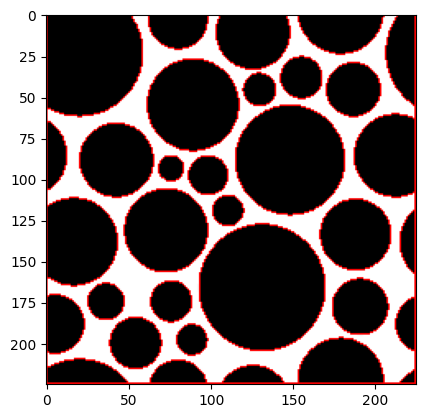

In [31]:
img = cv.imread('circles.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
_, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)

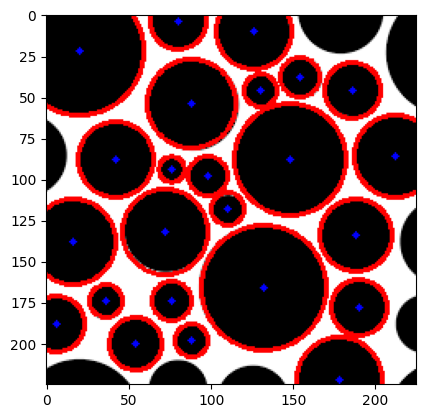

In [46]:
img2 = cv.imread('circles.png', cv.IMREAD_GRAYSCALE)
img2 = cv.medianBlur(img2,3)
cimg = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img2,cv.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,0,255),2)
    cv.circle(cimg,(i[0],i[1]),2,(255,0,0),-1)

plt.imshow(cv.cvtColor(cimg, cv.COLOR_BGR2RGB))